In [ ]:
!pip install --force-reinstall matplotlib

In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.artist'

In [ ]:
img = cv2.imread("./TestImages/testmessi.jpeg")
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

In [ ]:
gray

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_img,scaleFactor=1.1)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(face_img,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [2]:
cropped_img = np.array(roi_color)
cropped_img.shape

NameError: name 'roi_color' is not defined

In [3]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [4]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

NameError: name 'cropped_img' is not defined

In [43]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(gray)
        if len(eyes) >= 2:
            return roi_color
        else:
            print('Both eyes not detected correctly')

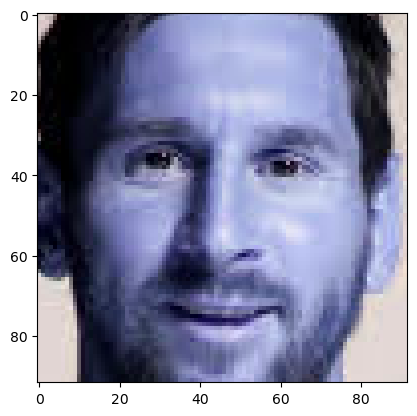

In [44]:
original_img = cv2.imread("./TestImages/testmessi.jpeg")
cropped_image = get_cropped_image_if_2_eyes('./TestImages/testmessi.jpeg')
plt.imshow(cropped_image)

In [45]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped/"

In [46]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [47]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [48]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Cristiano Ronaldo
Generating cropped images in folder:  ./data/cropped/Cristiano Ronaldo
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Erling Haaland
Generating cropped images in folder:  ./data/cropped/Erling Haaland
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Bot

In [49]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cristiano Ronaldo': ['./data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo1.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo10.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo11.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo12.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo13.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo14.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo15.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo16.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo17.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo18.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo19.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo2.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo20.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo21.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo22.png',
  './data/cropped/Cristiano Ronaldo\

In [50]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cristiano Ronaldo': 0,
 'Erling Haaland': 1,
 'Jude Bellingham': 2,
 'Kylian Mbappe': 3,
 'Leonel Messi': 4}

In [51]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [52]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(138, 4096)

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7428571428571429

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.57      0.67         7
           2       1.00      0.40      0.57         5
           3       0.58      0.88      0.70         8
           4       0.67      1.00      0.80         4

    accuracy                           0.74        35
   macro avg       0.79      0.73      0.72        35
weighted avg       0.80      0.74      0.74        35



In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\juan esteban\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\juan esteban\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\juan esteban\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\juan esteban\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_cla

,model,best_score,best_params
0,svm,0.776667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.496190,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.773810,{'logisticregression__C': 5}


In [59]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.8285714285714286

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [62]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8571428571428571

In [63]:
best_clf = best_estimators['svm']

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0, 0, 1, 1],
       [1, 5, 0, 1, 0],
       [0, 0, 4, 1, 0],
       [0, 1, 0, 7, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

In [94]:
!pip install seaborn==0.12.2

  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/293.3 kB ? eta -:--:--
   -- ------------------------------------ 20.5/293.3 kB 165.2 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/293.3 kB 163.8 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/293.3 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/293.3 kB 151.3 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/293.3 kB 218.6 kB/s eta 0:00:02
   ------------- ------------------------ 102.4/293.3 kB 281.0 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/293.3 kB 313.8 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/293.3 kB 339.7 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/293.3 kB 415.7 kB/s e

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\juan esteban\\anaconda3\\Lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [96]:
sns.__version__

'0.8.1'

In [95]:
import seaborn as sns
sns.heatmap(df, annot=True)
plt.show()

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [68]:
class_dict

{'Cristiano Ronaldo': 0,
 'Erling Haaland': 1,
 'Jude Bellingham': 2,
 'Kylian Mbappe': 3,
 'Leonel Messi': 4}